# Linear Probability Model

In [12]:
# Generate Data
import numpy as np
N = 10000
X = np.random.normal(0,1,(N,2))
u = np.random.normal(0,0.1,N)
β = np.array([0.5,-0.5])
yp = β*X + u
Y = np.where(yp>0,1,0)
print(Y[:10])
print(X[:10])

ValueError: operands could not be broadcast together with shapes (10000,2) (10000,) 

In [9]:
#estimation 

#β_hat = np.power(np.dot(x.T,x),-1)*np.dot(x.T,y)

# Least Squares
n, k = X.shape[0], 1
A = np.linalg.inv(np.dot(X.T, X))
b = np.dot(A, np.dot(X.T, y))
ŷ = np.dot(X, b)
e = y - ŷ
RSS = np.dot(e.T, e)
P = np.dot(np.dot(X, np.dot(X.T, X)), X.T) #Projection
M = np.identity(X.shape[0]) - P # Annihilation
TSS = np.dot(y.T,y) # Total Sum of Squares
ESS = np.dot(ŷ.T, ŷ) # Explained Sum of Squares
s = np.sqrt(RSS/(n-k)) # Estimate of SE of Unobserved
b_V = (s ** 2) * np.linalg.inv(np.dot(X.T, X))
b_se = np.diagonal(s * np.sqrt(np.where(A<0,0,A))).reshape(-1,1) # Estimate of SE of b
t = b/b_se.reshape(-1,1)
R2_UC = ESS/TSS # done with no intercept, to avoid less than zero R2.
R2 =  1 - RSS/(np.var(y)*n) # done when intercept is included, good!


LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

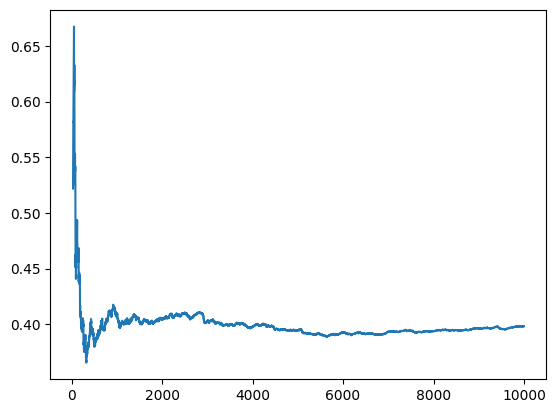

In [53]:
# Consistency of β_hat

β_hats = []
for n in range(30,N):
    β_hats.append(np.power(np.dot(x[:n].T,x[:n]),-1)*np.dot(x[:n].T,y[:n]))
    
import matplotlib.pyplot as plt
plt.plot(range(30,N), β_hats)
    